# Edge Impulse - Spectral Analysis Block
Implementation_version >= 2
- by Marcelo Rovai @ Nov22

### Statistical features per axis/channel:
- RMS (from Normalized data)
- Skewness
- Kurtosis

### Spectral features per axis/channel:
- Maximum value from FFT frames for each bin that was not filtered out
- The total number of features will change, depending on how you set the filter and FFT parameters.

https://docs.edgeimpulse.com/docs/edge-impulse-studio/processing-blocks/spectral-features

The Total Number of processed Featues per axis will be:
- RMS
- Skewness
- Curtosis
- 1/2 of FFT Lenght (no Filter)

For example, 
- for a FFT Lengh of 64 and filter NONE, the Total Processed Features per axis will be 35
- for a FFT Lengh of 64 and filter LOW, the Total Processed Features per axis will be lower than 35 depending on Filter Cut-off frequency (LOW: skip everything > cutoff; HIGH: skip everything < cutoff)

## Statistical features

In [35]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from scipy.stats import skew, kurtosis
from sklearn import preprocessing

Let's have a datasample of one accelerometer axix (2 seconds window; Sample frequency 40Hz)

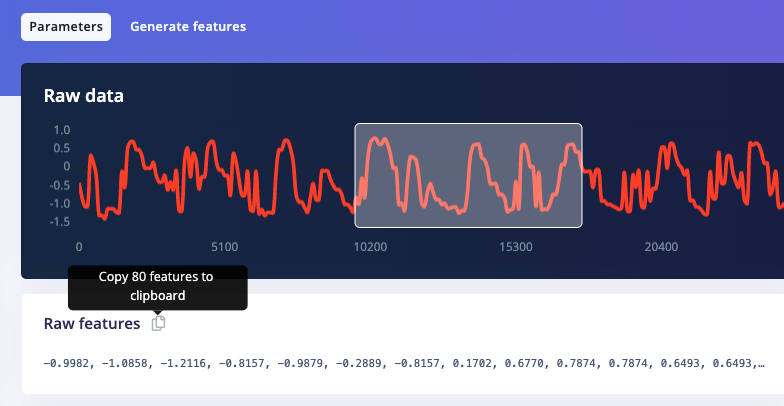

In [129]:
data=[-0.9982, -1.0858, -1.2116, -0.8157, -0.9879, -0.2889, -0.8157, 0.1702, 0.6770, 0.7874, 0.7874, 0.6493, 0.6493, 0.7874, 0.6493, 0.3756, -0.0118, -0.0118, -1.0040, -0.9688, -1.1677, -0.3429, 0.2894, 0.2801, 0.2137, -0.2654, -0.9647, -1.0509, -0.6662, -0.4338, -0.6662, -0.8658, -0.8658, -1.0040, -0.9688, -1.1031, -1.1031, -1.0723, -1.0723, -1.2367, -1.1677, -1.1660, -0.6857, 0.2894, 0.5962, 0.6322, 0.6322, 0.2801, 0.2137, 0.0001, -0.4396, -0.4396, -0.4396, -0.7268, -0.7268, -0.8252, -1.1959, -1.1456, -1.1162, -0.3780, -1.1162, 0.5846, 0.6295, 0.4266, 0.0224, 0.0224, -1.0522, -0.1305, -1.1373, -1.1273, -1.1273, -0.9655, -0.7273, -0.7273, -0.3780, 0.0852, 0.0852, 0.5846, 0.6295, 0.6295]

In [130]:
N = len(data)
N

80

/Users/marcelo_rovai/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


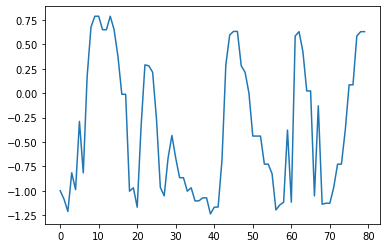

In [131]:
x = list(range(0, N))
sns.lineplot(x, data);

# Normalize data [-1,1]

In [132]:
dtmin, dtmax = min(data), max(data)
dtmin, dtmax

(-1.2367, 0.7874)

In [133]:
norm_data = data.copy()
norm_data = [((x - dtmin) / (dtmax-dtmin)) * 2 - 1 for x in norm_data]
min(norm_data), max(norm_data)

(-1.0, 1.0)

/Users/marcelo_rovai/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


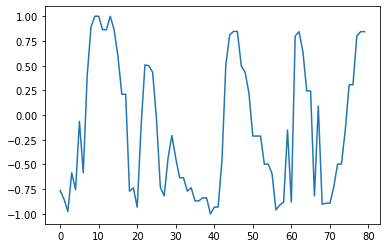

In [134]:
sns.lineplot(x, norm_data);

## RMS Calculation

The RMS value of a set of values (or a continuous-time waveform) is the square root of the arithmetic mean of the squares of the values, or the square of the function that defines the continuous waveform. In physics, the RMS current value can also be defined as the "value of the direct current that dissipates the same power in a resistor."

In the case of a set of n values $\{x_{1},x_{2},\dots ,x_{n}\}$, the RMS is:

$\displaystyle x_{\text{RMS}}={\sqrt {{\frac {1}{n}}\left(x_{1}^{2}+x_{2}^{2}+\cdots +x_{n}^{2}\right)}}.$

`NOTE that the RMS value is different for Normalized and Not Normalized data`

In [135]:
# Using regular python and not normalize data
rms = 0
for i in range(N):
    rms = rms + data[i]**2
rms = rms / N
rms = math.sqrt(rms)
print("rms = ", rms)

rms =  0.7723726893475714


In [136]:
# Using regular python and normalize data
rms = 0
for i in range(N):
    rms = rms + norm_data[i]**2
rms = rms / N
rms = math.sqrt(rms)
print("rms = ", rms)

rms =  0.68620324368935


In [137]:
# Using numpy and not normalized data
rms = np.sqrt(np.mean(np.square(data)))
print("rms = ", rms)

rms =  0.7723726893475714


In [138]:
# Using numpy and normalized data
rms = np.sqrt(np.mean(np.square(norm_data)))
print("rms = ", rms)

rms =  0.68620324368935


## Skewness and kurtosis calculation
https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85

In statistics, skewness and kurtosis are two ways to measure the **shape of a distribution**.

**Skewness** is a measure of the asymmetry of a distribution. This value can be positive or negative.
<img src="https://miro.medium.com/max/720/1*Gqd6Ioie0sa_Hryb3grsFQ.png" style="height:200px">
- A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.
- A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.
- A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

**Kurtosis** is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.
<img src="https://miro.medium.com/max/720/1*cfWYbVWYm5oCQqYWEPX5Bw.png" style="height:400px">
- The kurtosis of a normal distribution is 3.
- If a given distribution has a kurtosis of less than 3, it is said to be playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.
- If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution.

`NOTE that the Skewness and Kurtosis values is the same for Normalized and Not Normalized data`

Let's see the data distribution and the Skewness and kurtosis calculation

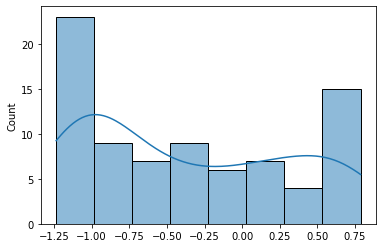

In [127]:
sns.histplot(data,kde=True);

In [126]:
print("skewness = ", skew(data, bias=False))
print("kurtosis = ", kurtosis(data, bias=False))

skewness =  0.335210535837773
kurtosis =  -1.4236630567783397


In [128]:
print("skewness = ", skew(norm_data, bias=False))
print("kurtosis = ", kurtosis(norm_data, bias=False))

skewness =  0.3352105358377731
kurtosis =  -1.4236630567783393


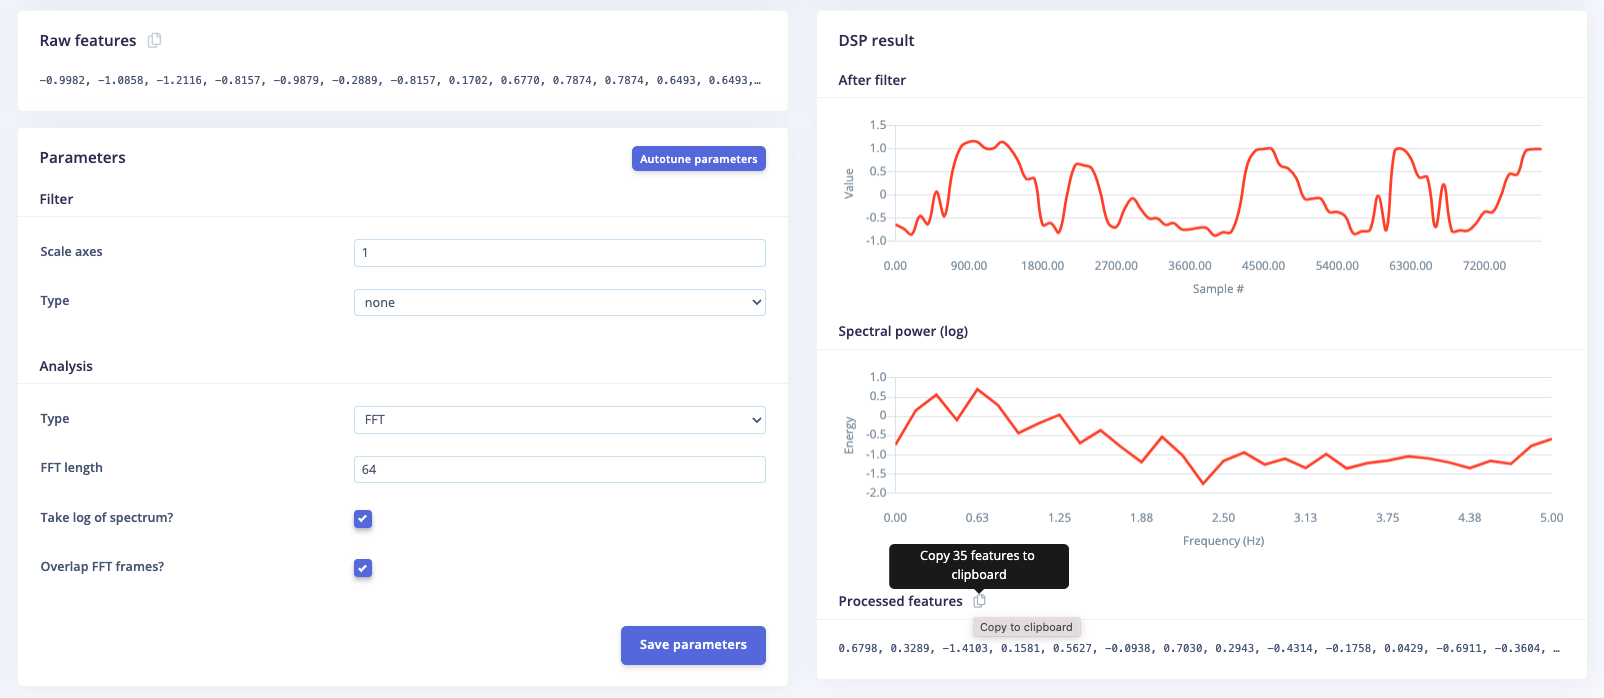

## Frequency Domain

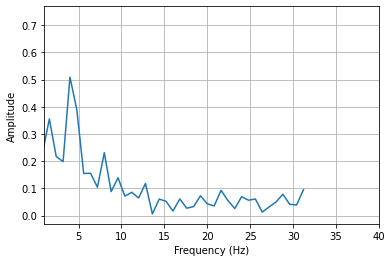

In [152]:
from scipy.fft import fft, fftfreq

# Number of sample points
N = 80
# sample spacing
T = 1.0 / 64
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(data)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(1, N/2)
plt.show()

In [147]:
yf[:5]

array([-29.332      -0.j        ,   8.35766199 -3.78492859j,
        -2.95847786-13.89202237j,  -5.75335668 +6.50062979j,
        -4.56852434 -6.48811173j])

/var/folders/5v/pg5r64d50z11vmcqp2074q2m0000gn/T/ipykernel_38265/1101646656.py:10: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \


(0.0, 20.0)

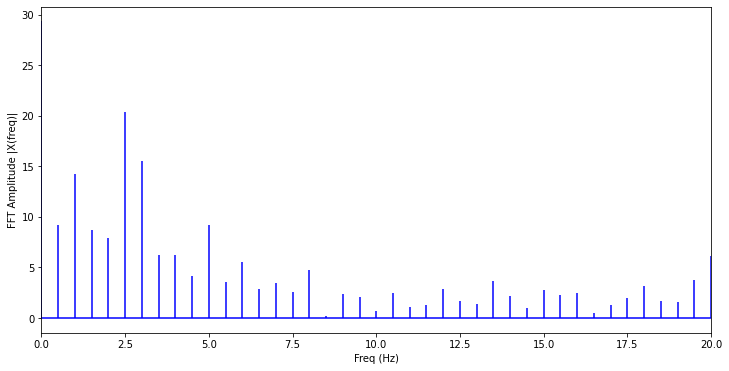

In [151]:
sr=40
X = fft(data)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, sr/2)

In [153]:
X = fft(data)
N = len(X)
N

80